## POS tagging using modified Viterbi

### 1. Data Preparation

In [1]:
#Importing libraries
import nltk, re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [2]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [3]:
#Verifying the list of nltk data
nltk_data

[[('Pierre', 'NOUN'),
  ('Vinken', 'NOUN'),
  (',', '.'),
  ('61', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  (',', '.'),
  ('will', 'VERB'),
  ('join', 'VERB'),
  ('the', 'DET'),
  ('board', 'NOUN'),
  ('as', 'ADP'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
  ('director', 'NOUN'),
  ('Nov.', 'NOUN'),
  ('29', 'NUM'),
  ('.', '.')],
 [('Mr.', 'NOUN'),
  ('Vinken', 'NOUN'),
  ('is', 'VERB'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Elsevier', 'NOUN'),
  ('N.V.', 'NOUN'),
  (',', '.'),
  ('the', 'DET'),
  ('Dutch', 'NOUN'),
  ('publishing', 'VERB'),
  ('group', 'NOUN'),
  ('.', '.')],
 [('Rudolph', 'NOUN'),
  ('Agnew', 'NOUN'),
  (',', '.'),
  ('55', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  ('and', 'CONJ'),
  ('former', 'ADJ'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Consolidated', 'NOUN'),
  ('Gold', 'NOUN'),
  ('Fields', 'NOUN'),
  ('PLC', 'NOUN'),
  (',', '.'),
  ('was', 'VERB'),
  ('named', 'VERB'),
  ('*-1', 'X'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
 

**Splitting into train and test sets**

In [4]:
#Splitting into train and validation set in a ratio fo 95:5
random.seed(1234)
train_set,validation_set = train_test_split(nltk_data,test_size=0.05)

In [5]:
#Verifying the length of train and validation set
print(len(train_set))
print(len(validation_set))

3718
196


In [6]:
#viewing few of train data set
train_set[:15]

[[('He', 'PRON'),
  ('has', 'VERB'),
  ('in', 'ADP'),
  ('tow', 'NOUN'),
  ('his', 'PRON'),
  ('prescient', 'ADJ'),
  ('girlfriend', 'NOUN'),
  (',', '.'),
  ('whose', 'PRON'),
  ('sassy', 'ADJ'),
  ('retorts', 'NOUN'),
  ('*T*-54', 'X'),
  ('mark', 'VERB'),
  ('her', 'PRON'),
  ('as', 'ADP'),
  ('anything', 'NOUN'),
  ('but', 'CONJ'),
  ('a', 'DET'),
  ('docile', 'ADJ'),
  ('butterfly', 'NOUN'),
  ('.', '.')],
 [('Sir', 'NOUN'),
  ('Peter', 'NOUN'),
  ('will', 'VERB'),
  ('succeed', 'VERB'),
  ('Sir', 'NOUN'),
  ('John', 'NOUN'),
  ('Milne', 'NOUN'),
  (',', '.'),
  ('65', 'NUM'),
  (',', '.'),
  ('who', 'PRON'),
  ('*T*-158', 'X'),
  ('retires', 'VERB'),
  ('as', 'ADP'),
  ('Blue', 'NOUN'),
  ('Circle', 'NOUN'),
  ('nonexecutive', 'ADJ'),
  ('chairman', 'NOUN'),
  ('on', 'ADP'),
  ('June', 'NOUN'),
  ('1', 'NUM'),
  ('.', '.')],
 [('And', 'CONJ'),
  (',', '.'),
  ('indeed', 'ADV'),
  (',', '.'),
  ('the', 'DET'),
  ('lawsuit', 'NOUN'),
  ('was', 'VERB'),
  ('dismissed', 'VERB'),
  ('

In [7]:
#Getting list of tagged words

train_tagged_words = [tup for sent in train_set for tup in sent]
print(len(train_tagged_words))
#few train tagged words
train_tagged_words[:5]

95479


[('He', 'PRON'),
 ('has', 'VERB'),
 ('in', 'ADP'),
 ('tow', 'NOUN'),
 ('his', 'PRON')]

In [8]:
#tokens
tokens = [tup[0] for tup in train_tagged_words]

In [9]:
#distinct tokens or Vocabulary
V = set(tokens)
print(len(V))


12026


In [10]:
#print vocabulary
V

{'chunks',
 'becoming',
 'grant',
 'arrangements',
 'brat',
 'DEPOSIT',
 'historically',
 'carrying',
 'shedding',
 'supporters',
 'performed',
 'shipbuilding',
 'Raleigh',
 'break',
 'Grace',
 'movement',
 "CREATOR'S",
 'invested',
 'ministers',
 'Cote',
 'free-lance',
 'switched',
 'vendors',
 'economical',
 'INGERSOLL-RAND',
 'voice',
 'paperback',
 'anywhere',
 '35.7',
 'Fountain',
 'Long-term',
 'coke',
 'Hawaiian',
 'Philip',
 'Due',
 'Gillespie',
 'darned',
 'Interviews',
 '90-day',
 'tracked',
 'services',
 'race',
 '*-109',
 'financed',
 'retraced',
 'chest',
 'shared',
 'malignant',
 'Coast',
 'designated',
 'lack',
 'Communication',
 '672',
 'proving',
 'administer',
 'markup',
 '*T*-163',
 're-election',
 'Nature',
 '600,000',
 'Dreyfus',
 'administrative',
 'regrettable',
 'therapies',
 'president',
 'similar',
 'principals',
 'Scoring',
 '*-166',
 'tapes',
 'survivor',
 'brunt',
 'Glass',
 'Jeremy',
 '4.55',
 'cost-sharing',
 'vague',
 '100,980',
 'second-largest',
 'pric

In [11]:
#tags
tags = [tup[1] for tup in train_tagged_words ]

In [12]:
#distinct tags
T= set(tags)
print(len(T))

12


In [13]:
#print tags
T

{'.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X'}

### 2. Build the vanilla Viterbi based POS tagger

#### POS Tagging Algorithm - HMM

We'll use the HMM algorithm to tag the words. Given a sequence of words to be tagged, the task is to assign the most probable tag to the word. 

In other words, to every word w, assign the tag t that maximises the likelihood P(t/w). Since P(t/w) = P(w/t). P(t) / P(w), after ignoring P(w), we have to compute P(w/t) and P(t).


P(w/t) is basically the probability that given a tag (say NN), what is the probability of it being w (say 'building'). This can be computed by computing the fraction of all NNs which are equal to w, i.e. 

P(w/t) = count(w, t) / count(t). 


The term P(t) is the probability of tag t, and in a tagging task, we assume that a tag will depend only on the previous tag. In other words, the probability of a tag being NN will depend only on the previous tag t(n-1). So for e.g. if t(n-1) is a JJ, then t(n) is likely to be an NN since adjectives often precede a noun (blue coat, tall building etc.).


Given the penn treebank tagged dataset, we can compute the two terms P(w/t) and P(t) and store them in two large matrices. The matrix of P(w/t) will be sparse, since each word will not be seen with most tags ever, and those terms will thus be zero. 

**Emission Probabilities**

In [14]:
# computing P(w/t) and storing in T x V matrix
t= len(T)
v= len(V)
w_given_t = np.zeros((t,v))

In [15]:
#compute word given tag : emission probability
def word_given_tag(word,tag,train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if(pair[1] == tag)] 
    count_tag = len(tag_list)
    w_given_tag_list = [pair for pair in tag_list if(pair[0] == word)]
    count_w_given_tag =len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)
    

In [16]:
#verifying the function for one of the words
print(word_given_tag('on', 'ADP'))

(458, 9332)


**Transition Probabilities**

In [17]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability
def t2_given_t1(t2,t1,train_bag= train_tagged_words):
    tags = [pair[1] for pair in train_bag ]
    count_t1 = len([tag for tag in tags if(tag == t1)])
    count_t2_t1 = 0
    for i in range(len(tags)-1):
        if((tags[i]==t1) and (tags[i+1]==t2)):
            count_t2_t1 += 1
    return (count_t2_t1,count_t1)

In [18]:
#verifying the function for one of the combinations
print(t2_given_t1('ADJ', 'ADP'))

(996, 9332)


In [19]:
#Please note P(tag|start) is same as P(tag|'.')
#Verifying start tag for few of the tags`
print(t2_given_t1('ADJ', '.'))
print(t2_given_t1('ADP', '.'))


(490, 11152)
(1019, 11152)


In [20]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [21]:
#Verifying the tag matrix
tags_matrix

array([[1.69570625e-01, 1.33400753e-01, 3.58587429e-02, 3.12694460e-02,
        9.11636576e-02, 6.50280043e-02, 5.36714355e-03, 1.08820781e-01,
        2.18341634e-01, 8.18294957e-02, 3.59365270e-02, 2.34131925e-02],
       [3.94082703e-02, 5.33527322e-03, 1.68546140e-02, 1.21256213e-04,
        9.21547227e-03, 2.04559237e-01, 4.85024852e-04, 6.40232801e-01,
        4.52285670e-02, 1.26106460e-02, 3.63768637e-03, 2.23111436e-02],
       [8.82352963e-02, 1.72794119e-01, 9.51398835e-02, 2.24175025e-03,
        9.13737416e-02, 4.39383052e-02, 5.79268299e-02, 2.20319226e-01,
        2.71700136e-02, 5.27259670e-02, 6.65351525e-02, 8.15100446e-02],
       [3.97385627e-01, 1.00326799e-01, 4.21568640e-02, 1.96078443e-03,
        2.05882359e-02, 8.52941200e-02, 2.28758180e-03, 2.50653595e-01,
        1.24183008e-02, 1.01307193e-02, 1.83006544e-02, 5.84967323e-02],
       [8.35833699e-03, 3.24689239e-01, 3.96485217e-02, 1.50021433e-03,
        1.66095160e-02, 1.06729530e-01, 6.42949017e-04, 3.21

In [22]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns=list(T),index =list(T))
tags_df

,VERB,DET,.,PRT,ADP,ADJ,CONJ,NOUN,X,ADV,PRON,NUM
VERB,0.169571,0.133401,0.035859,0.031269,0.091164,0.065028,0.005367,0.108821,0.218342,0.081829,0.035937,0.023413
DET,0.039408,0.005335,0.016855,0.000121,0.009215,0.204559,0.000485,0.640233,0.045229,0.012611,0.003638,0.022311
.,0.088235,0.172794,0.095140,0.002242,0.091374,0.043938,0.057927,0.220319,0.027170,0.052726,0.066535,0.081510
PRT,0.397386,0.100327,0.042157,0.001961,0.020588,0.085294,0.002288,0.250654,0.012418,0.010131,0.018301,0.058497
ADP,0.008358,0.324689,0.039649,0.001500,0.016610,0.106730,0.000643,0.321260,0.034398,0.013716,0.068903,0.063545
ADJ,0.012064,0.004297,0.063295,0.010907,0.077012,0.067592,0.016857,0.700050,0.020658,0.004793,0.000661,0.021815
CONJ,0.158240,0.119382,0.036517,0.004682,0.052434,0.117509,0.000468,0.349719,0.007491,0.054307,0.058521,0.040730
NOUN,0.146320,0.013162,0.240722,0.044678,0.175825,0.012065,0.042192,0.264817,0.029030,0.017074,0.004607,0.009506
X,0.204313,0.055112,0.163898,0.182748,0.146805,0.016933,0.010543,0.061661,0.073642,0.025240,0.056390,0.002716
ADV,0.344942,0.067330,0.134660,0.014262,0.120398,0.128690,0.006965,0.031841,0.023881,0.080265,0.015257,0.031509


In [23]:
#Verifying the probability of start tag
tags_df.loc['.', :]

VERB    0.088235
DET     0.172794
.       0.095140
PRT     0.002242
ADP     0.091374
ADJ     0.043938
CONJ    0.057927
NOUN    0.220319
X       0.027170
ADV     0.052726
PRON    0.066535
NUM     0.081510
Name: ., dtype: float32

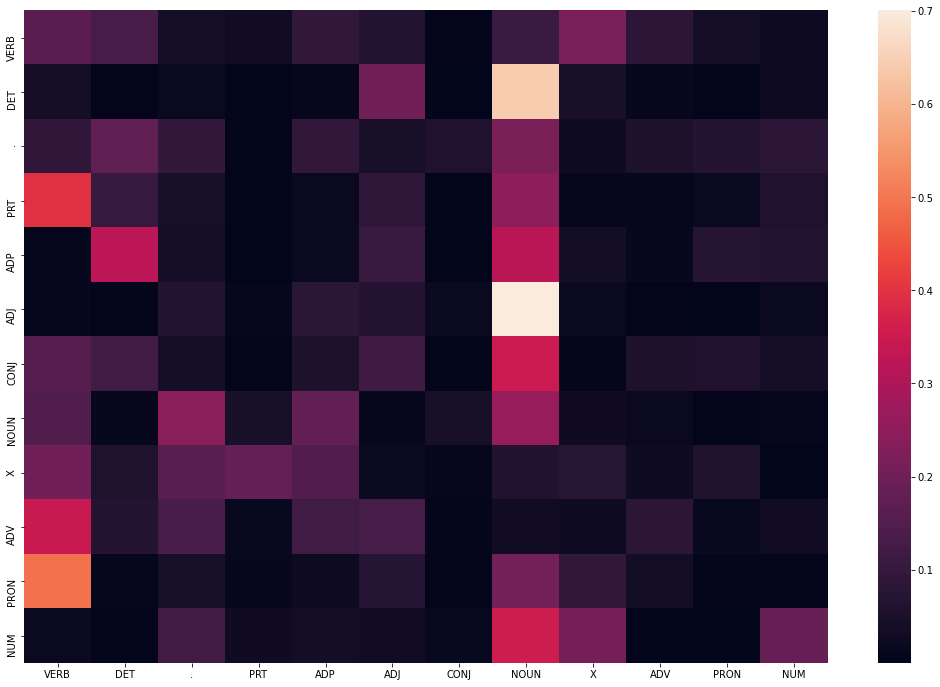

In [24]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

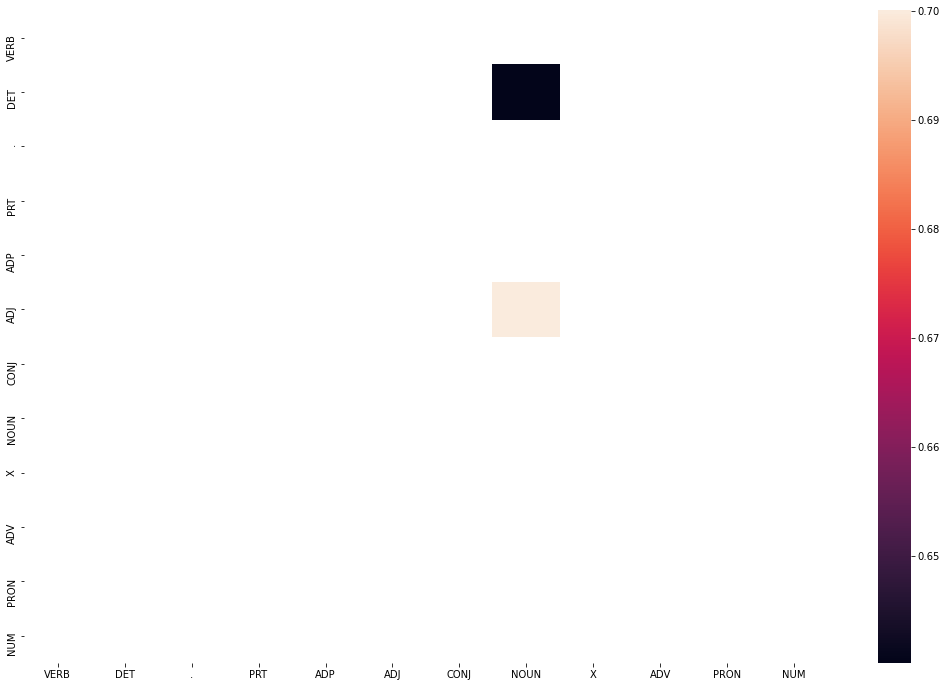

In [25]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df >0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

**Viterbi Algorithm**

Let's now use the computed probabilities P(w, tag) and P(t2, t1) to assign tags to each word in the document. We'll run through each word w and compute P(tag/w)=P(w/tag).P(tag) for each tag in the tag set, and then assign the tag having the max P(tag/w).

We'll store the assigned tags in a list of tuples, similar to the list 'train_tagged_words'. Each tuple will be a (token, assigned_tag). As we progress further in the list, each tag to be assigned will use the tag of the previous token.

Note: P(tag|start) = P(tag|'.') 

In [26]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state=[]
    T= list(set([pair[1] for pair in train_bag]))
    
    for key,word in enumerate(words):
        #initialise list of probability column for a given sentence
        p = []
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.',tag]
            else:
                transition_p = tags_df.loc[state[-1],tag]
            
            #compute emission and state probabilities
            emission_p = word_given_tag(words[key],tag)[0]/word_given_tag(words[key],tag)[1]
            state_probability = emission_p * transition_p
            p.append(state_probability)
            
        pmax = max(p)
        #getting state for which probability is maximum
        state_max = T[p.index(pmax)]
        state.append(state_max)
        
    return list(zip(words,state))


### 3. Evaluating on Validation Set

In [27]:
#Will work on the validation set to test the algorithm
validation_set

[[('Until', 'ADP'),
  ('Congress', 'NOUN'),
  ('acts', 'VERB'),
  (',', '.'),
  ('the', 'DET'),
  ('government', 'NOUN'),
  ('has', 'VERB'),
  ("n't", 'ADV'),
  ('any', 'DET'),
  ('authority', 'NOUN'),
  ('*', 'X'),
  ('to', 'PRT'),
  ('issue', 'VERB'),
  ('new', 'ADJ'),
  ('debt', 'NOUN'),
  ('obligations', 'NOUN'),
  ('of', 'ADP'),
  ('any', 'DET'),
  ('kind', 'NOUN'),
  (',', '.'),
  ('the', 'DET'),
  ('Treasury', 'NOUN'),
  ('said', 'VERB'),
  ('0', 'X'),
  ('*T*-1', 'X'),
  ('.', '.')],
 [('In', 'ADP'),
  ('Chile', 'NOUN'),
  (',', '.'),
  ('workers', 'NOUN'),
  ('at', 'ADP'),
  ('two', 'NUM'),
  ('copper', 'NOUN'),
  ('mines', 'NOUN'),
  (',', '.'),
  ('Los', 'NOUN'),
  ('Bronces', 'NOUN'),
  ('and', 'CONJ'),
  ('El', 'NOUN'),
  ('Soldado', 'NOUN'),
  (',', '.'),
  ('which', 'DET'),
  ('*T*-1', 'X'),
  ('belong', 'VERB'),
  ('to', 'PRT'),
  ('the', 'DET'),
  ('Exxon-owned', 'ADJ'),
  ('Minera', 'NOUN'),
  ('Disputada', 'NOUN'),
  (',', '.'),
  ('yesterday', 'NOUN'),
  ('voted', '

In [28]:
#list of tagged words
test_run_base = [tup for sent in validation_set for tup in sent]

#list of untagged words
test_tagged_words = [tup[0] for sent in validation_set for tup in sent]

In [29]:
#printing the test_run_base and test_tagged_words
print(test_run_base)
print("======================================================================================================================")
print(test_tagged_words)

[('Until', 'ADP'), ('Congress', 'NOUN'), ('acts', 'VERB'), (',', '.'), ('the', 'DET'), ('government', 'NOUN'), ('has', 'VERB'), ("n't", 'ADV'), ('any', 'DET'), ('authority', 'NOUN'), ('*', 'X'), ('to', 'PRT'), ('issue', 'VERB'), ('new', 'ADJ'), ('debt', 'NOUN'), ('obligations', 'NOUN'), ('of', 'ADP'), ('any', 'DET'), ('kind', 'NOUN'), (',', '.'), ('the', 'DET'), ('Treasury', 'NOUN'), ('said', 'VERB'), ('0', 'X'), ('*T*-1', 'X'), ('.', '.'), ('In', 'ADP'), ('Chile', 'NOUN'), (',', '.'), ('workers', 'NOUN'), ('at', 'ADP'), ('two', 'NUM'), ('copper', 'NOUN'), ('mines', 'NOUN'), (',', '.'), ('Los', 'NOUN'), ('Bronces', 'NOUN'), ('and', 'CONJ'), ('El', 'NOUN'), ('Soldado', 'NOUN'), (',', '.'), ('which', 'DET'), ('*T*-1', 'X'), ('belong', 'VERB'), ('to', 'PRT'), ('the', 'DET'), ('Exxon-owned', 'ADJ'), ('Minera', 'NOUN'), ('Disputada', 'NOUN'), (',', '.'), ('yesterday', 'NOUN'), ('voted', 'VERB'), ('*-2', 'X'), ('to', 'PRT'), ('begin', 'VERB'), ('a', 'DET'), ('full', 'ADJ'), ('strike', 'NOUN'

**Defining a function to run different Viterbi algorithms**

In [30]:
#Function to run Viterbi algorithms
def run_Viterbi(algo,sequence_to_be_tagged=test_tagged_words):
    start =time.time()
    #the tagged sequence as per the algorithm
    tagged_seq = algo(sequence_to_be_tagged)
    end=time.time()
    #time it took to run the algo
    time_diff = end- start
    #creating a list of matching tags to calculate accuracy
    check = [i for i,j in zip(tagged_seq,test_run_base) if(i==j)]
    #Verifing accuracy
    accuracy = len(check)/len(tagged_seq)
    return time_diff,tagged_seq,accuracy

**Tagging the validation sentences**

In [31]:
#Verifying the accuracy on Viterbi algorithm
time_diff,tagged_seq,accuracy = run_Viterbi(Viterbi)

**Verifying the accuracy of tagged sentences**

In [32]:
#Printing the results of vanilla Viterbi algorithm
print("The time it took to execute Viterbi algorithm is: {}".format(time_diff))
print("The accuracy post execution of Viterbi algorithm is: {}".format(accuracy*100))

The time it took to execute Viterbi algorithm is: 1314.818651676178
The accuracy post execution of Viterbi algorithm is: 90.91783721377718


In [33]:
#Printing the tagged sequence
tagged_seq

[('Until', 'ADP'),
 ('Congress', 'NOUN'),
 ('acts', 'VERB'),
 (',', '.'),
 ('the', 'DET'),
 ('government', 'NOUN'),
 ('has', 'VERB'),
 ("n't", 'ADV'),
 ('any', 'DET'),
 ('authority', 'NOUN'),
 ('*', 'X'),
 ('to', 'PRT'),
 ('issue', 'NOUN'),
 ('new', 'ADJ'),
 ('debt', 'NOUN'),
 ('obligations', 'NOUN'),
 ('of', 'ADP'),
 ('any', 'DET'),
 ('kind', 'NOUN'),
 (',', '.'),
 ('the', 'DET'),
 ('Treasury', 'NOUN'),
 ('said', 'VERB'),
 ('0', 'X'),
 ('*T*-1', 'X'),
 ('.', '.'),
 ('In', 'ADP'),
 ('Chile', 'NOUN'),
 (',', '.'),
 ('workers', 'NOUN'),
 ('at', 'ADP'),
 ('two', 'NUM'),
 ('copper', 'NOUN'),
 ('mines', 'NOUN'),
 (',', '.'),
 ('Los', 'NOUN'),
 ('Bronces', 'VERB'),
 ('and', 'CONJ'),
 ('El', 'NOUN'),
 ('Soldado', 'VERB'),
 (',', '.'),
 ('which', 'DET'),
 ('*T*-1', 'X'),
 ('belong', 'VERB'),
 ('to', 'PRT'),
 ('the', 'DET'),
 ('Exxon-owned', 'VERB'),
 ('Minera', 'VERB'),
 ('Disputada', 'VERB'),
 (',', '.'),
 ('yesterday', 'NOUN'),
 ('voted', 'VERB'),
 ('*-2', 'X'),
 ('to', 'PRT'),
 ('begin', 'V

**Identifying the incorrectly tagged words**

In [34]:
#Printing the incorrectly tagged words 
incorrect_tagged_cases = [[test_run_base[i-1],j] for i,j in enumerate(zip(tagged_seq,test_run_base)) if (j[0]!=j[1])]
incorrect_tagged_cases

[[('to', 'PRT'), (('issue', 'NOUN'), ('issue', 'VERB'))],
 [('Los', 'NOUN'), (('Bronces', 'VERB'), ('Bronces', 'NOUN'))],
 [('El', 'NOUN'), (('Soldado', 'VERB'), ('Soldado', 'NOUN'))],
 [('the', 'DET'), (('Exxon-owned', 'VERB'), ('Exxon-owned', 'ADJ'))],
 [('Exxon-owned', 'ADJ'), (('Minera', 'VERB'), ('Minera', 'NOUN'))],
 [('Minera', 'NOUN'), (('Disputada', 'VERB'), ('Disputada', 'NOUN'))],
 [('the', 'DET'), (('astonishment', 'VERB'), ('astonishment', 'NOUN'))],
 [('and', 'CONJ'), (('dismay', 'VERB'), ('dismay', 'NOUN'))],
 [('her', 'PRON'), (('superiors', 'VERB'), ('superiors', 'NOUN'))],
 [('--', '.'), (('and', 'CONJ'), ('and', 'ADJ'))],
 [('the', 'DET'), (('unpopularity', 'VERB'), ('unpopularity', 'NOUN'))],
 [('--', '.'), (('Mrs', 'VERB'), ('Mrs', 'NOUN'))],
 [('huge', 'ADJ'), (('Soviet', 'NOUN'), ('Soviet', 'ADJ'))],
 [('any', 'DET'), (('merger-related', 'VERB'), ('merger-related', 'ADJ'))],
 [('merger-related', 'ADJ'), (('matters', 'VERB'), ('matters', 'NOUN'))],
 [('to', 'PRT')

### 4. Solve the problem of unknown words

In [35]:
#Printing the correct tags for the incorrectly tagged words so as to define new/ update existing rules for tagging
incorrectly_tagged_words = [seq[1][1] for seq in incorrect_tagged_cases]
print(len(incorrectly_tagged_words))
incorrectly_tagged_words

472


[('issue', 'VERB'),
 ('Bronces', 'NOUN'),
 ('Soldado', 'NOUN'),
 ('Exxon-owned', 'ADJ'),
 ('Minera', 'NOUN'),
 ('Disputada', 'NOUN'),
 ('astonishment', 'NOUN'),
 ('dismay', 'NOUN'),
 ('superiors', 'NOUN'),
 ('and', 'ADJ'),
 ('unpopularity', 'NOUN'),
 ('Mrs', 'NOUN'),
 ('Soviet', 'ADJ'),
 ('merger-related', 'ADJ'),
 ('matters', 'NOUN'),
 ('drop', 'VERB'),
 ('much', 'ADJ'),
 ('Elsevier', 'NOUN'),
 ('Dutch', 'NOUN'),
 ('publishing', 'VERB'),
 ('*T*-195', 'X'),
 ('fueling', 'NOUN'),
 ('airports', 'NOUN'),
 ('most', 'ADV'),
 ('fiscal', 'NOUN'),
 ('Earlier', 'ADJ'),
 ('up', 'PRT'),
 ('570', 'NUM'),
 ('5.6', 'NUM'),
 ('ex-dividend', 'ADJ'),
 ('partisan', 'ADJ'),
 ('bickering', 'NOUN'),
 ('*T*-177', 'X'),
 ('entangled', 'ADJ'),
 ('capital-gains', 'NOUN'),
 ('default', 'NOUN'),
 ('trading', 'VERB'),
 ('anecdotal', 'ADJ'),
 ('Gates-Warren', 'NOUN'),
 ('Sotheby', 'NOUN'),
 ('Iran\\/Contra', 'NOUN'),
 ('affair', 'NOUN'),
 ('Mayer', 'NOUN'),
 ('*-140', 'X'),
 ('parishes', 'NOUN'),
 ('inner-city', '

In [36]:
#Printing the incorrectly tagged words which were not present in the training data so as to identify new rules for such scenarios
incorrect_test_not_in_train = [tup for tup in incorrectly_tagged_words if tup not in train_tagged_words]
print(len(incorrect_test_not_in_train))
incorrect_test_not_in_train

358


[('Bronces', 'NOUN'),
 ('Soldado', 'NOUN'),
 ('Exxon-owned', 'ADJ'),
 ('Minera', 'NOUN'),
 ('Disputada', 'NOUN'),
 ('astonishment', 'NOUN'),
 ('dismay', 'NOUN'),
 ('superiors', 'NOUN'),
 ('unpopularity', 'NOUN'),
 ('Mrs', 'NOUN'),
 ('merger-related', 'ADJ'),
 ('Elsevier', 'NOUN'),
 ('Dutch', 'NOUN'),
 ('*T*-195', 'X'),
 ('fueling', 'NOUN'),
 ('airports', 'NOUN'),
 ('fiscal', 'NOUN'),
 ('570', 'NUM'),
 ('5.6', 'NUM'),
 ('ex-dividend', 'ADJ'),
 ('partisan', 'ADJ'),
 ('bickering', 'NOUN'),
 ('*T*-177', 'X'),
 ('entangled', 'ADJ'),
 ('capital-gains', 'NOUN'),
 ('anecdotal', 'ADJ'),
 ('Gates-Warren', 'NOUN'),
 ('Sotheby', 'NOUN'),
 ('Iran\\/Contra', 'NOUN'),
 ('affair', 'NOUN'),
 ('Mayer', 'NOUN'),
 ('*-140', 'X'),
 ('parishes', 'NOUN'),
 ('inner-city', 'NOUN'),
 ('then-Speaker', 'ADJ'),
 ('Mikhail', 'NOUN'),
 ('SALT', 'NOUN'),
 ('Mannix', 'NOUN'),
 ('accidentally', 'ADV'),
 ('jam', 'NOUN'),
 ('cocoa', 'NOUN'),
 ('war-rationed', 'ADJ'),
 ('goodies', 'NOUN'),
 ('Lilly', 'NOUN'),
 ('market-sh

In [37]:
#Printing the incorrectly tagged words which were not present in the training data along with the tags of the previously ocurring words
incorrect_test_not_in_train_cases = [(seq[0][1],seq[1][1]) for seq in incorrect_tagged_cases if((seq[1][1]) in incorrect_test_not_in_train)]
incorrect_test_not_in_train_cases

[('NOUN', ('Bronces', 'NOUN')),
 ('NOUN', ('Soldado', 'NOUN')),
 ('DET', ('Exxon-owned', 'ADJ')),
 ('ADJ', ('Minera', 'NOUN')),
 ('NOUN', ('Disputada', 'NOUN')),
 ('DET', ('astonishment', 'NOUN')),
 ('CONJ', ('dismay', 'NOUN')),
 ('PRON', ('superiors', 'NOUN')),
 ('DET', ('unpopularity', 'NOUN')),
 ('.', ('Mrs', 'NOUN')),
 ('DET', ('merger-related', 'ADJ')),
 ('ADP', ('Elsevier', 'NOUN')),
 ('DET', ('Dutch', 'NOUN')),
 ('DET', ('*T*-195', 'X')),
 ('.', ('fueling', 'NOUN')),
 ('CONJ', ('airports', 'NOUN')),
 ('ADJ', ('fiscal', 'NOUN')),
 ('.', ('570', 'NUM')),
 ('ADP', ('5.6', 'NUM')),
 ('VERB', ('ex-dividend', 'ADJ')),
 ('ADP', ('partisan', 'ADJ')),
 ('ADJ', ('bickering', 'NOUN')),
 ('DET', ('*T*-177', 'X')),
 ('VERB', ('entangled', 'ADJ')),
 ('VERB', ('capital-gains', 'NOUN')),
 ('ADV', ('anecdotal', 'ADJ')),
 ('NOUN', ('Gates-Warren', 'NOUN')),
 ('ADP', ('Sotheby', 'NOUN')),
 ('DET', ('Iran\\/Contra', 'NOUN')),
 ('NOUN', ('affair', 'NOUN')),
 ('ADP', ('Mayer', 'NOUN')),
 ('VERB', ('*

**Approach 1- Rule Based Tagging**

In [38]:
#Defining a new function to tag words not present in training data based on some rules and defining those rules using regex
def rule_based_regex(word):
    pos_tag=""
    if(re.search("\d",word)):
        if(re.search("\*",word)):
            pos_tag = 'X'
        elif(re.search("[A-Za-z]+",word)):
            pos_tag = 'ADJ'
        else:
            pos_tag = 'NUM'
    elif(word.endswith("ed") | word.endswith("ing")):
        pos_tag = 'VERB'
    else:
        pos_tag = 'NOUN'
    return pos_tag

In [39]:
# Updating the vanilla Viterbi model to define tags for unknow words using approach1 - rule based tagging by calling the rule_based_regex function
def Viterbi_modified_1(words, train_bag = train_tagged_words):
    state=[]
    T= list(set([pair[1] for pair in train_bag]))
    
    for key,word in enumerate(words):
        if(word not in ([tup[0] for tup in train_bag])):
            #calling the rule_based_regex function here
            state.append(rule_based_regex(word))
        else:
            p = []
            for tag in T:
                if key == 0:
                    transition_p = tags_df.loc['.',tag]
                else:
                    transition_p = tags_df.loc[state[-1],tag]

                #compute emission and state probabilities
                
                emission_p = word_given_tag(words[key],tag)[0]/word_given_tag(words[key],tag)[1]
                state_probability = emission_p * transition_p
                p.append(state_probability)

            pmax = max(p)
            #getting state for which probability is maximum
            state_max = T[p.index(pmax)]
            state.append(state_max)
        
    return list(zip(words,state))


In [40]:
#Verifying the accuracy on newly tagged sequence
time_diff,tagged_seq,accuracy = run_Viterbi(Viterbi_modified_1)

In [41]:
#Printing the output of Viterbi after modification using approach 1
print("The time it took to execute modified Viterbi algorithm as per approach 1 is: {}".format(time_diff))
print("The accuracy post execution of modified Viterbi algorithm as per approach 1 is: {}".format(accuracy*100))

The time it took to execute modified Viterbi algorithm as per approach 1 is: 1236.110841035843
The accuracy post execution of modified Viterbi algorithm as per approach 1 is: 95.15104868193188


In [42]:
tagged_seq

[('Until', 'ADP'),
 ('Congress', 'NOUN'),
 ('acts', 'VERB'),
 (',', '.'),
 ('the', 'DET'),
 ('government', 'NOUN'),
 ('has', 'VERB'),
 ("n't", 'ADV'),
 ('any', 'DET'),
 ('authority', 'NOUN'),
 ('*', 'X'),
 ('to', 'PRT'),
 ('issue', 'NOUN'),
 ('new', 'ADJ'),
 ('debt', 'NOUN'),
 ('obligations', 'NOUN'),
 ('of', 'ADP'),
 ('any', 'DET'),
 ('kind', 'NOUN'),
 (',', '.'),
 ('the', 'DET'),
 ('Treasury', 'NOUN'),
 ('said', 'VERB'),
 ('0', 'X'),
 ('*T*-1', 'X'),
 ('.', '.'),
 ('In', 'ADP'),
 ('Chile', 'NOUN'),
 (',', '.'),
 ('workers', 'NOUN'),
 ('at', 'ADP'),
 ('two', 'NUM'),
 ('copper', 'NOUN'),
 ('mines', 'NOUN'),
 (',', '.'),
 ('Los', 'NOUN'),
 ('Bronces', 'NOUN'),
 ('and', 'CONJ'),
 ('El', 'NOUN'),
 ('Soldado', 'NOUN'),
 (',', '.'),
 ('which', 'DET'),
 ('*T*-1', 'X'),
 ('belong', 'VERB'),
 ('to', 'PRT'),
 ('the', 'DET'),
 ('Exxon-owned', 'VERB'),
 ('Minera', 'NOUN'),
 ('Disputada', 'NOUN'),
 (',', '.'),
 ('yesterday', 'NOUN'),
 ('voted', 'VERB'),
 ('*-2', 'X'),
 ('to', 'PRT'),
 ('begin', 'V

****Approach 2- Probabilistic approach****

In [43]:
# Updating the vanilla Viterbi model to define tags for unknow words using approach2 - probabilistic approach i.e.
# Calculating state_probability = transition_p for words not present in training set 
# And using state_probability = emission_p * transition_p for known words
def Viterbi_modified_2(words, train_bag = train_tagged_words):
    state=[]
    T= list(set([pair[1] for pair in train_bag]))
    
    for key,word in enumerate(words):
        
        #initialise list of probability column for a given sentence
            p = []
            for tag in T:
                if key == 0:
                    transition_p = tags_df.loc['.',tag]
                else:
                    transition_p = tags_df.loc[state[-1],tag]

                #compute emission and state probabilities
                
                emission_p = word_given_tag(words[key],tag)[0]/word_given_tag(words[key],tag)[1]
                #Updated logic to calculate state probability
                if(word not in ([tup[0] for tup in train_bag])):
                    #For words not in training set
                    state_probability = transition_p
                else:
                    #For words in training set
                    state_probability = emission_p * transition_p
                p.append(state_probability)

            pmax = max(p)
            #getting state for which probability is maximum
            state_max = T[p.index(pmax)]
            state.append(state_max)
        
    return list(zip(words,state))


In [44]:
#Verifying the accuracy on newly tagged sequence
time_diff,tagged_seq,accuracy = run_Viterbi(Viterbi_modified_2)


In [45]:
#Printing the output of Viterbi after modification using approach 2
print("The time it took to execute modified Viterbi algorithm as per approach 2 is: {}".format(time_diff))
print("The accuracy post execution of modified Viterbi algorithm as per approach 2 is: {}".format(accuracy*100))

The time it took to execute modified Viterbi algorithm as per approach 2 is: 1982.9660754203796
The accuracy post execution of modified Viterbi algorithm as per approach 2 is: 93.01520107754475


In [47]:
tagged_seq

[('Until', 'ADP'),
 ('Congress', 'NOUN'),
 ('acts', 'VERB'),
 (',', '.'),
 ('the', 'DET'),
 ('government', 'NOUN'),
 ('has', 'VERB'),
 ("n't", 'ADV'),
 ('any', 'DET'),
 ('authority', 'NOUN'),
 ('*', 'X'),
 ('to', 'PRT'),
 ('issue', 'NOUN'),
 ('new', 'ADJ'),
 ('debt', 'NOUN'),
 ('obligations', 'NOUN'),
 ('of', 'ADP'),
 ('any', 'DET'),
 ('kind', 'NOUN'),
 (',', '.'),
 ('the', 'DET'),
 ('Treasury', 'NOUN'),
 ('said', 'VERB'),
 ('0', 'X'),
 ('*T*-1', 'X'),
 ('.', '.'),
 ('In', 'ADP'),
 ('Chile', 'NOUN'),
 (',', '.'),
 ('workers', 'NOUN'),
 ('at', 'ADP'),
 ('two', 'NUM'),
 ('copper', 'NOUN'),
 ('mines', 'NOUN'),
 (',', '.'),
 ('Los', 'NOUN'),
 ('Bronces', 'NOUN'),
 ('and', 'CONJ'),
 ('El', 'NOUN'),
 ('Soldado', 'NOUN'),
 (',', '.'),
 ('which', 'DET'),
 ('*T*-1', 'X'),
 ('belong', 'VERB'),
 ('to', 'PRT'),
 ('the', 'DET'),
 ('Exxon-owned', 'NOUN'),
 ('Minera', 'NOUN'),
 ('Disputada', 'NOUN'),
 (',', '.'),
 ('yesterday', 'NOUN'),
 ('voted', 'VERB'),
 ('*-2', 'X'),
 ('to', 'PRT'),
 ('begin', 'V

### 5. Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

We saw that below are the tagging accuracies on the training set for different approaches:
Accuracy of Vanilla Viterbi (i.e. without any changes in the usual Viterbi algorithm)- 90.917

Accuracy of modified Viterbi using Rule based techniques (i.e. alongwith Viterbi using regext to tag unknown words)- 95.151

Accuracy of modified Viterbi using Proababilistic technique (i.e. alongwith Viterbi using Probabilistic aproach  to tag unknown words)- 93.015

Hence we were able to improve the accuracy using different techniques alongwith Viterbi algorithm.

#### Evaluating the above algorithms on test set provided in the module

In [48]:
#Reading the test data set
test_set = pd.read_csv("Test_sentences.txt",error_bad_lines=False,names=['test_data'])
test_set

,test_data
0,Android is a mobile operating system developed...
1,Android has been the best-selling OS worldwide...
2,Google and Twitter made a deal in 2015 that ga...
3,Twitter is an online news and social networkin...
4,Before entering politics
5,The 2018 FIFA World Cup is the 21st FIFA World...
6,This is the first World Cup to be held in East...
7,Show me the cheapest round trips from Dallas t...
8,I would like to see flights from Denver to Phi...
9,Show me the price of the flights leaving Atlan...


In [50]:
#Extracting data into a list
test_data_list = [sent for sent in test_set['test_data']]
test_data_list

['Android is a mobile operating system developed by Google.',
 'Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.',
 "Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.",
 'Twitter is an online news and social networking service on which users post and interact with messages known as tweets.',
 'Before entering politics',
 'The 2018 FIFA World Cup is the 21st FIFA World Cup',
 'This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.',
 'Show me the cheapest round trips from Dallas to Atlanta',
 'I would like to see flights from Denver to Philadelphia.',
 'Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.',
 'NASA invited social media users to experience the launch of ICESAT-2 Satellite.']

In [51]:
#Extracting words from the sentences
word_list = [sent.split() for sent in test_data_list]
word_list

[['Android',
  'is',
  'a',
  'mobile',
  'operating',
  'system',
  'developed',
  'by',
  'Google.'],
 ['Android',
  'has',
  'been',
  'the',
  'best-selling',
  'OS',
  'worldwide',
  'on',
  'smartphones',
  'since',
  '2011',
  'and',
  'on',
  'tablets',
  'since',
  '2013.'],
 ['Google',
  'and',
  'Twitter',
  'made',
  'a',
  'deal',
  'in',
  '2015',
  'that',
  'gave',
  'Google',
  'access',
  'to',
  "Twitter's",
  'firehose.'],
 ['Twitter',
  'is',
  'an',
  'online',
  'news',
  'and',
  'social',
  'networking',
  'service',
  'on',
  'which',
  'users',
  'post',
  'and',
  'interact',
  'with',
  'messages',
  'known',
  'as',
  'tweets.'],
 ['Before', 'entering', 'politics'],
 ['The',
  '2018',
  'FIFA',
  'World',
  'Cup',
  'is',
  'the',
  '21st',
  'FIFA',
  'World',
  'Cup'],
 ['This',
  'is',
  'the',
  'first',
  'World',
  'Cup',
  'to',
  'be',
  'held',
  'in',
  'Eastern',
  'Europe',
  'and',
  'the',
  '11th',
  'time',
  'that',
  'it',
  'has',
  'bee

In [52]:
#Extracting word list form test data
test_words = [word for words in word_list for word in words]
test_words

['Android',
 'is',
 'a',
 'mobile',
 'operating',
 'system',
 'developed',
 'by',
 'Google.',
 'Android',
 'has',
 'been',
 'the',
 'best-selling',
 'OS',
 'worldwide',
 'on',
 'smartphones',
 'since',
 '2011',
 'and',
 'on',
 'tablets',
 'since',
 '2013.',
 'Google',
 'and',
 'Twitter',
 'made',
 'a',
 'deal',
 'in',
 '2015',
 'that',
 'gave',
 'Google',
 'access',
 'to',
 "Twitter's",
 'firehose.',
 'Twitter',
 'is',
 'an',
 'online',
 'news',
 'and',
 'social',
 'networking',
 'service',
 'on',
 'which',
 'users',
 'post',
 'and',
 'interact',
 'with',
 'messages',
 'known',
 'as',
 'tweets.',
 'Before',
 'entering',
 'politics',
 'The',
 '2018',
 'FIFA',
 'World',
 'Cup',
 'is',
 'the',
 '21st',
 'FIFA',
 'World',
 'Cup',
 'This',
 'is',
 'the',
 'first',
 'World',
 'Cup',
 'to',
 'be',
 'held',
 'in',
 'Eastern',
 'Europe',
 'and',
 'the',
 '11th',
 'time',
 'that',
 'it',
 'has',
 'been',
 'held',
 'in',
 'Europe.',
 'Show',
 'me',
 'the',
 'cheapest',
 'round',
 'trips',
 'from'

In [54]:
#The length of test dataset word list
print(len(test_words))

149


### List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

**Running Vanilla Viterbi on test set**

In [56]:
#Function to run Viterbi algorithms on test set words
def run_Viterbi_on_test(algo,sequence_to_be_tagged=test_tagged_words):
    start =time.time()
    #the tagged sequence as per the algorithm
    tagged_seq = algo(sequence_to_be_tagged)
    end=time.time()
    #time it took to run the algo
    time_diff = end- start
    return time_diff,tagged_seq

In [58]:
#Verifying the accuracy on newly tagged sequence
time_diff,tagged_seq = run_Viterbi_on_test(Viterbi,test_words)

In [59]:
#Printing the output of Viterbi before modification
print("The time it took to execute vanilla Viterbi algorithm is: {}".format(time_diff))
tagged_seq

The time it took to execute modified Viterbi algorithm as per approach 2 is: 40.64333534240723


[('Android', 'VERB'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN'),
 ('system', 'NOUN'),
 ('developed', 'VERB'),
 ('by', 'ADP'),
 ('Google.', 'VERB'),
 ('Android', 'VERB'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('the', 'DET'),
 ('best-selling', 'ADJ'),
 ('OS', 'VERB'),
 ('worldwide', 'VERB'),
 ('on', 'ADP'),
 ('smartphones', 'VERB'),
 ('since', 'ADP'),
 ('2011', 'VERB'),
 ('and', 'CONJ'),
 ('on', 'ADP'),
 ('tablets', 'VERB'),
 ('since', 'ADP'),
 ('2013.', 'VERB'),
 ('Google', 'VERB'),
 ('and', 'CONJ'),
 ('Twitter', 'VERB'),
 ('made', 'VERB'),
 ('a', 'DET'),
 ('deal', 'NOUN'),
 ('in', 'ADP'),
 ('2015', 'VERB'),
 ('that', 'ADP'),
 ('gave', 'VERB'),
 ('Google', 'VERB'),
 ('access', 'NOUN'),
 ('to', 'PRT'),
 ("Twitter's", 'VERB'),
 ('firehose.', 'VERB'),
 ('Twitter', 'VERB'),
 ('is', 'VERB'),
 ('an', 'DET'),
 ('online', 'VERB'),
 ('news', 'NOUN'),
 ('and', 'CONJ'),
 ('social', 'ADJ'),
 ('networking', 'NOUN'),
 ('service', 'NOUN'),
 ('on', 'ADP'),
 ('which', 'D

**Running Viterbi modified using approach1 on test set**

In [61]:
#Verifying the accuracy on newly tagged sequence
time_diff,tagged_seq = run_Viterbi_on_test(Viterbi_modified_1,test_words)

In [62]:
#Printing the output of Viterbi after modification using approach 1
print("The time it took to execute modified Viterbi algorithm as per approach 1 is: {}".format(time_diff))
tagged_seq

The time it took to execute modified Viterbi algorithm as per approach 1 is: 33.708832025527954


[('Android', 'NOUN'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN'),
 ('system', 'NOUN'),
 ('developed', 'VERB'),
 ('by', 'ADP'),
 ('Google.', 'NOUN'),
 ('Android', 'NOUN'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('the', 'DET'),
 ('best-selling', 'ADJ'),
 ('OS', 'NOUN'),
 ('worldwide', 'NOUN'),
 ('on', 'ADP'),
 ('smartphones', 'NOUN'),
 ('since', 'ADP'),
 ('2011', 'NUM'),
 ('and', 'CONJ'),
 ('on', 'ADP'),
 ('tablets', 'NOUN'),
 ('since', 'ADP'),
 ('2013.', 'NUM'),
 ('Google', 'NOUN'),
 ('and', 'CONJ'),
 ('Twitter', 'NOUN'),
 ('made', 'VERB'),
 ('a', 'DET'),
 ('deal', 'NOUN'),
 ('in', 'ADP'),
 ('2015', 'NUM'),
 ('that', 'ADP'),
 ('gave', 'VERB'),
 ('Google', 'NOUN'),
 ('access', 'NOUN'),
 ('to', 'PRT'),
 ("Twitter's", 'NOUN'),
 ('firehose.', 'NOUN'),
 ('Twitter', 'NOUN'),
 ('is', 'VERB'),
 ('an', 'DET'),
 ('online', 'NOUN'),
 ('news', 'NOUN'),
 ('and', 'CONJ'),
 ('social', 'ADJ'),
 ('networking', 'NOUN'),
 ('service', 'NOUN'),
 ('on', 'ADP'),
 ('which', 'DET'

**Running Viterbi modified using approach2 on test set**

In [63]:
#Verifying the accuracy on newly tagged sequence
time_diff,tagged_seq = run_Viterbi_on_test(Viterbi_modified_2,test_words)

In [64]:
#Printing the output of Viterbi after modification using approach 2
print("The time it took to execute modified Viterbi algorithm as per approach 2 is: {}".format(time_diff))
tagged_seq

The time it took to execute modified Viterbi algorithm as per approach 2 is: 61.908342123031616


[('Android', 'NOUN'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN'),
 ('system', 'NOUN'),
 ('developed', 'VERB'),
 ('by', 'ADP'),
 ('Google.', 'DET'),
 ('Android', 'NOUN'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('the', 'DET'),
 ('best-selling', 'ADJ'),
 ('OS', 'NOUN'),
 ('worldwide', 'NOUN'),
 ('on', 'ADP'),
 ('smartphones', 'DET'),
 ('since', 'ADP'),
 ('2011', 'DET'),
 ('and', 'CONJ'),
 ('on', 'ADP'),
 ('tablets', 'DET'),
 ('since', 'ADP'),
 ('2013.', 'DET'),
 ('Google', 'NOUN'),
 ('and', 'CONJ'),
 ('Twitter', 'NOUN'),
 ('made', 'VERB'),
 ('a', 'DET'),
 ('deal', 'NOUN'),
 ('in', 'ADP'),
 ('2015', 'DET'),
 ('that', 'ADP'),
 ('gave', 'VERB'),
 ('Google', 'X'),
 ('access', 'NOUN'),
 ('to', 'PRT'),
 ("Twitter's", 'VERB'),
 ('firehose.', 'X'),
 ('Twitter', 'VERB'),
 ('is', 'VERB'),
 ('an', 'DET'),
 ('online', 'NOUN'),
 ('news', 'NOUN'),
 ('and', 'CONJ'),
 ('social', 'ADJ'),
 ('networking', 'NOUN'),
 ('service', 'NOUN'),
 ('on', 'ADP'),
 ('which', 'DET'),
 ('use

### Comparison of few cases where the test words have been tagged differently

**<u>Correction using Approach 1</u>**

**Case 1**

Vanilla Viterbi- ('Google', 'VERB'),

Vanilla Viterbi modified using Approach 1 - ('Google', 'NOUN')

**Case 2**

Vanilla Viterbi- ('trips', 'VERB'),

Vanilla Viterbi modified using Approach 1 - ('trips', 'NOUN')

**Case 3**

Vanilla Viterbi- ('2011', 'VERB'),

Vanilla Viterbi modified using Approach 1 - ('2011', 'NUM')

**<u>Correction using Approach 2</u>**

**Case 1**

Vanilla Viterbi- ('Google', 'VERB'),

Vanilla Viterbi modified using Approach 2 - ('Google', 'NOUN')

**Case 2**

Vanilla Viterbi- ('trips', 'VERB'),

Vanilla Viterbi modified using Approach 2 - ('trips', 'NOUN')


**Case 3**

Vanilla Viterbi- ('Francisco.', 'VERB'),

Vanilla Viterbi modified using Approach 2 - ('Francisco.', 'NOUN')

### CONCLUSION

Hence we can see that there is an improvement in accuracy after using modified Viterbi algorithms.

Accuracy of Vanilla Viterbi (i.e. without any changes in the usual Viterbi algorithm)- 90.917

Accuracy of modified Viterbi using Rule based techniques (i.e. alongwith Viterbi using regext to tag unknown words)- 95.151

Accuracy of modified Viterbi using Proababilistic technique (i.e. alongwith Viterbi using Probabilistic aproach  to tag unknown words)- 93.015

And also we have observed few cases where the test set tags are corrected using modified approaches.